### 1. _Put phone in dev mode and installed Android ADB._
### 2. _Locate spotify usage and extract with ADB._
### 3. _Only one line of bash script really._
### 4. _Convert the txt to csv. et voila!._

In [199]:
#! pip install spotipy numpy pandas seaborn beautifulsoup4 matplotlib python-dotenv wordcloud pprint

In [200]:
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# not scientific numbers
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True)


### _why am i rewriting this over and over - use a function silly!!_

In [201]:
# cleaning the csv converted from txt
# making timestamp datetime - spitting date and time new columns - sort

def clean_usage_tables(file_path):
    # read - dropna - timestam to datetime - split to date & time columns sort byt date & time
    df = pd.read_csv(file_path)
    df = df.dropna()
    df = df.drop(columns=['Application'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = df['Timestamp'].dt.date
    df['Time'] = df['Timestamp'].dt.time
    df = df.sort_values(by=['Date', 'Time'])

    return df

## _1_

In [202]:
df1 = clean_usage_tables('data/my_spotify_usage_1.csv')
df1.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-16 11:31:05,USER_INTERACTION,2025-02-16,11:31:05
1,2025-02-16 11:31:06,ACTIVITY_RESUMED,2025-02-16,11:31:06
2,2025-02-16 11:31:24,FOREGROUND_SERVICE_START,2025-02-16,11:31:24
3,2025-02-16 11:31:24,NOTIFICATION_INTERRUPTION,2025-02-16,11:31:24
4,2025-02-16 11:31:27,ACTIVITY_PAUSED,2025-02-16,11:31:27


# _2_

In [203]:
df2 = clean_usage_tables('data/my_spotify_usage_2.csv')
df2.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-18 10:40:31,ACTIVITY_RESUMED,2025-02-18,10:40:31
1,2025-02-18 10:40:40,ACTIVITY_PAUSED,2025-02-18,10:40:40
2,2025-02-18 10:40:41,ACTIVITY_STOPPED,2025-02-18,10:40:41
3,2025-02-18 11:27:08,FOREGROUND_SERVICE_STOP,2025-02-18,11:27:08
4,2025-02-18 12:23:40,USER_INTERACTION,2025-02-18,12:23:40


# _3_

In [204]:
df3 = clean_usage_tables('data/my_spotify_usage_3.csv')
df3.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-19 10:15:28,FOREGROUND_SERVICE_START,2025-02-19,10:15:28
1,2025-02-19 10:15:28,NOTIFICATION_INTERRUPTION,2025-02-19,10:15:28
2,2025-02-19 10:15:32,FOREGROUND_SERVICE_START,2025-02-19,10:15:32
3,2025-02-19 10:15:32,FOREGROUND_SERVICE_STOP,2025-02-19,10:15:32
4,2025-02-19 10:25:48,FOREGROUND_SERVICE_STOP,2025-02-19,10:25:48


# _4_

In [205]:
df4 = clean_usage_tables('data/my_spotify_usage_4.csv')
df4.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-17 08:38:56,USER_INTERACTION,2025-02-17,08:38:56
1,2025-02-17 08:38:56,ACTIVITY_RESUMED,2025-02-17,08:38:56
2,2025-02-17 08:39:03,FOREGROUND_SERVICE_START,2025-02-17,08:39:03
3,2025-02-17 08:39:03,NOTIFICATION_INTERRUPTION,2025-02-17,08:39:03
4,2025-02-17 08:39:06,ACTIVITY_PAUSED,2025-02-17,08:39:06


# _5_

In [206]:
df5 = clean_usage_tables('data/my_spotify_usage_5.csv')
df5.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-20 09:56:58,USER_INTERACTION,2025-02-20,09:56:58
1,2025-02-20 09:56:58,ACTIVITY_RESUMED,2025-02-20,09:56:58
2,2025-02-20 09:57:02,ACTIVITY_PAUSED,2025-02-20,09:57:02
3,2025-02-20 09:57:02,SHORTCUT_INVOCATION,2025-02-20,09:57:02
4,2025-02-20 09:57:02,SHORTCUT_INVOCATION,2025-02-20,09:57:02


# _6_

In [207]:
df6 = clean_usage_tables('data/my_spotify_usage_6.csv')
df6.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-21 09:42:32,FOREGROUND_SERVICE_START,2025-02-21,09:42:32
1,2025-02-21 09:42:32,NOTIFICATION_INTERRUPTION,2025-02-21,09:42:32
2,2025-02-21 09:42:37,FOREGROUND_SERVICE_START,2025-02-21,09:42:37
3,2025-02-21 09:42:39,FOREGROUND_SERVICE_STOP,2025-02-21,09:42:39
4,2025-02-21 09:55:27,FOREGROUND_SERVICE_STOP,2025-02-21,09:55:27


# _7_

In [208]:
df7 = clean_usage_tables('data/my_spotify_usage_7.csv')
df7.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-22 09:33:18,FOREGROUND_SERVICE_START,2025-02-22,09:33:18
1,2025-02-22 09:33:18,NOTIFICATION_INTERRUPTION,2025-02-22,09:33:18
2,2025-02-22 10:18:49,FOREGROUND_SERVICE_STOP,2025-02-22,10:18:49
3,2025-02-22 12:23:10,USER_INTERACTION,2025-02-22,12:23:10
4,2025-02-22 12:23:10,FOREGROUND_SERVICE_START,2025-02-22,12:23:10


## _mearge all_

In [209]:
# concat for all same columns

my_spotify_usage = pd.concat([df1,df2,df3,df5,df5,df6,df7]).drop_duplicates(subset=['Timestamp'])


In [210]:
# sort by date and rest index
my_spotify_usage.sort_values(by=['Date'])

cleaned_my_spotify_usage = my_spotify_usage.reset_index(drop=True)


In [211]:
# final df or 7-ish days of spotify mobile app interactions

cleaned_my_spotify_usage.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-16 11:31:05,USER_INTERACTION,2025-02-16,11:31:05
1,2025-02-16 11:31:06,ACTIVITY_RESUMED,2025-02-16,11:31:06
2,2025-02-16 11:31:24,FOREGROUND_SERVICE_START,2025-02-16,11:31:24
3,2025-02-16 11:31:27,ACTIVITY_PAUSED,2025-02-16,11:31:27
4,2025-02-16 11:31:34,ACTIVITY_PAUSED,2025-02-16,11:31:34


### _plot daily interactions with Spotify mobile app_

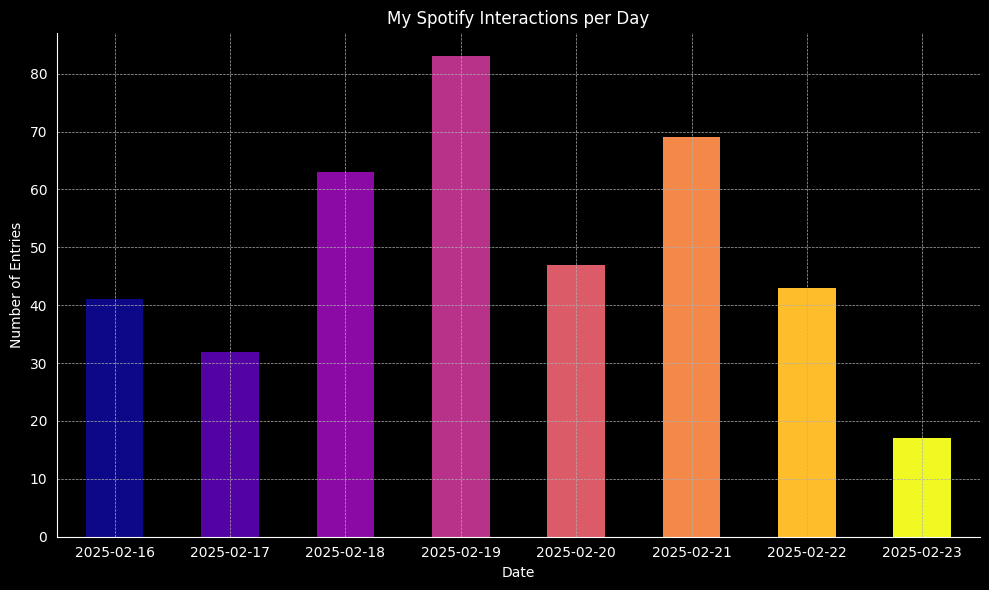

In [212]:
# which days had the most interaction?

daily_spotify_activity = cleaned_my_spotify_usage.groupby('Date').size()

# plasma colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(daily_spotify_activity)))

#bar chart
plt.figure(figsize=(10, 6), facecolor='black')
daily_spotify_activity.plot(kind='bar', color=colors)

ax = plt.gca()  

ax.set_facecolor("black")
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')


plt.title('My Spotify Interactions per Day', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Number of Entries', color='white')
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')
plt.tight_layout()

plt.grid(linestyle='--', linewidth=0.5)
plt.show()

# _get first and last per day_

In [213]:
# group by date - find first and last

first_and_last = pd.DataFrame(cleaned_my_spotify_usage.groupby(cleaned_my_spotify_usage['Timestamp']).agg(
    first_interaction=('Time', 'first'),
    last_interaction=('Time', 'last'),
    first_activity_type=('Activity Type', 'first'),
    last_activity_type=('Activity Type', 'last')
).reset_index())



#pprint.pprint(first_and_last)

In [214]:
pprint.pprint(first_and_last.dtypes)

Timestamp              datetime64[ns]
first_interaction              object
last_interaction               object
first_activity_type            object
last_activity_type             object
dtype: object


* value counts for ACTIVITY_RESUMED, FOREGROUND_SERVICE_START, SHORTCUT_INVOCATION

In [215]:
# filter for activity types
activity_filter = cleaned_my_spotify_usage[cleaned_my_spotify_usage['Activity Type'].isin(['ACTIVITY_RESUMED', 'FOREGROUND_SERVICE_START', 'SHORTCUT_INVOCATION'])]


In [216]:
# counts for each type
activity_count = pd.DataFrame(activity_filter['Activity Type'].value_counts())

activity_count

,count
Activity Type,
ACTIVITY_RESUMED,62
FOREGROUND_SERVICE_START,46
SHORTCUT_INVOCATION,14
